In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [ ]:
# Load the dataset
train_data = pd.read_csv("/content/drive/MyDrive/training.csv")
test_data = pd.read_csv("/content/drive/MyDrive/test.csv")
train_data.head(5)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,...,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,...,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,...,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,...,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0
4,817482,NaN,COMMERCIAL,ID,836,55,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,15.276000,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0


**EDA**

In [ ]:
print(train_data.info())
print(train_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 83 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             12906 non-null  int64  
 1   patient_race                           6521 non-null   object 
 2   payer_type                             11103 non-null  object 
 3   patient_state                          12855 non-null  object 
 4   patient_zip3                           12906 non-null  int64  
 5   patient_age                            12906 non-null  int64  
 6   patient_gender                         12906 non-null  object 
 7   bmi                                    3941 non-null   float64
 8   breast_cancer_diagnosis_code           12906 non-null  object 
 9   breast_cancer_diagnosis_desc           12906 non-null  object 
 10  metastatic_cancer_diagnosis_code       12906 non-null  object 
 11  me

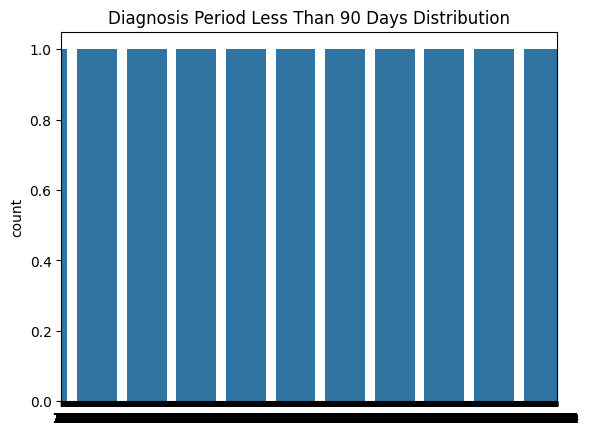

In [ ]:
# Visualize the target variable distribution
sns.countplot(train_data['DiagPeriodL90D'])
plt.title('Diagnosis Period Less Than 90 Days Distribution')
plt.show()

In [ ]:
test_data.head(5)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02
0,573710,White,MEDICAID,IN,467,54,F,NaN,C50412,Malig neoplasm of upper-outer quadrant of left...,...,3.56,14.00,7.99,0.97,24.96,10.84,8.08,38.72,7.95,11.16
1,593679,NaN,COMMERCIAL,FL,337,52,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,10.26,16.02,13.60,2.84,23.95,10.58,9.30,36.92,7.84,13.60
2,184532,Hispanic,MEDICAID,CA,917,61,F,NaN,C50911,Malignant neoplasm of unsp site of right femal...,...,47.73,9.90,10.52,12.75,32.53,7.26,3.81,47.31,9.60,20.08
3,447383,Hispanic,MEDICARE ADVANTAGE,CA,917,64,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,47.73,9.90,10.52,12.75,32.53,7.26,3.81,47.31,9.60,20.08
4,687972,Black,NaN,CA,900,40,F,23.00,C50412,Malig neoplasm of upper-outer quadrant of left...,...,45.53,11.90,20.76,14.74,30.71,10.34,3.03,41.19,11.17,21.64


In [ ]:
# Dropping irrelevant columns or columns with too many missing values
train_data.drop(columns=["patient_id", "metastatic_first_novel_treatment", "metastatic_first_novel_treatment_type"], inplace=True)
test_data.drop(columns=["patient_id", "metastatic_first_novel_treatment", "metastatic_first_novel_treatment_type"], inplace=True)

In [ ]:
# Handling missing values
train_data.fillna(train_data.mean(), inplace=True)
test_data.fillna(test_data.mean(), inplace=True)

<ipython-input-6-155756e08228>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.fillna(train_data.mean(), inplace=True)
<ipython-input-6-155756e08228>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_data.fillna(test_data.mean(), inplace=True)


In [ ]:
# Encode categorical variables
train_data = pd.get_dummies(train_data)
test_data= pd.get_dummies(test_data)

In [ ]:
# Ensure consistency in column names after encoding
# Get common columns between training and test datasets after encoding
common_columns = set(train_data.columns).intersection(test_data.columns)

# Filter both training and test datasets based on common columns
train_data_encoded = train_data[common_columns]
test_data_encoded = test_data[common_columns]


<ipython-input-8-30c42f12c354>:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_data_encoded = train_data[common_columns]
<ipython-input-8-30c42f12c354>:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  test_data_encoded = test_data[common_columns]


In [ ]:
# Define features (X) and target variable (y)
X_train = train_data_encoded
y_train = train_data["DiagPeriodL90D"]
X_test = test_data_encoded

**Stacked model**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression


# Initialize and train the StackingClassifier
base_estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', make_pipeline(StandardScaler(), SVC(random_state=42))),
    ('xgb', XGBClassifier(random_state=42))
]

# Define stacking classifier with base estimators
stack_model = StackingClassifier(estimators=base_estimators, final_estimator=LogisticRegression())

# Define hyperparameters grid for tuning
param_grid = {
    'rf__n_estimators': [50, 100, 150],
    'dt__max_depth': [None, 10, 20],
    'svm__svc__C': [0.1, 1, 10],
    'xgb__learning_rate': [0.1, 0.01],
    'final_estimator__C': [0.1, 1, 10]
}

# Perform grid search with cross-validation, scoring='roc_auc'
grid_search = GridSearchCV(stack_model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_stack_model = grid_search.best_estimator_

# Make predictions on the test dataset using the best model
stack_pred = best_stack_model.predict(X_test)

# Print the best parameters and AUC value
print("Best parameters:", grid_search.best_params_)
print("Best AUC value:", grid_search.best_score_)


cv_results = grid_search.cv_results_
auc_values = cv_results['mean_test_score']
# Print AUC values for each fold
print("AUC values for each fold:")
for i, auc in enumerate(auc_values):
    print(f"Fold {i+1}: {auc}")

print("AUC values for each fold:", auc_values)


In [ ]:
# Concatenate patient IDs from the test dataset with predicted values
test_data = pd.read_csv("/content/drive/MyDrive/test.csv")
predictions_with_ids = pd.DataFrame({'patient_id': test_data['patient_id'], 'DiagPeriodL90D': stack_pred})

# Save predictions with patient IDs to a file
predictions_with_ids.to_csv('/content/drive/MyDrive/predictions.csv', index=False)
